In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

sns.set(style="whitegrid")

In [3]:
file_path = r"E:\ElevateLabs\8\Mall_Customers.csv"

df = pd.read_csv(file_path)
print("Shape:", df.shape)
df.head()

Shape: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Select features for clustering
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features].values

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("First 5 scaled rows:\n", X_scaled[:5])


First 5 scaled rows:
 [[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


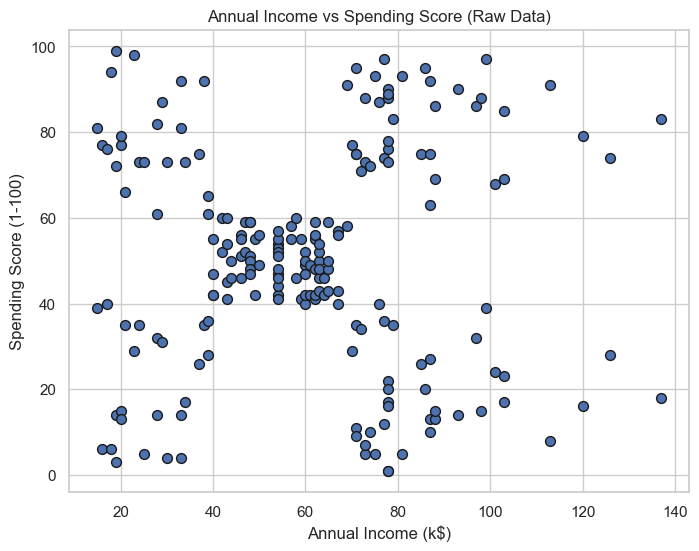

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], s=50, edgecolor='k')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title("Annual Income vs Spending Score (Raw Data)")
plt.show()

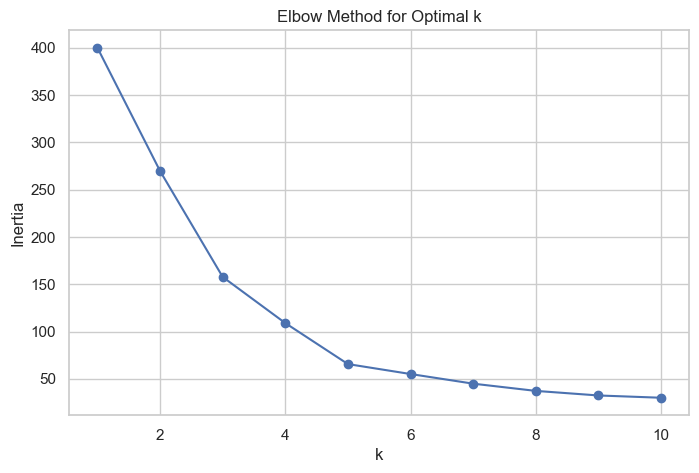

In [6]:
inertias = []
k_values = range(1, 11)

for k in k_values:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_values, inertias, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()


In [7]:
k = 5
kmeans = KMeans(n_clusters=k, n_init=50, random_state=42)
labels = kmeans.fit_predict(X_scaled)

print("Cluster counts:", np.bincount(labels))


Cluster counts: [81 39 22 35 23]


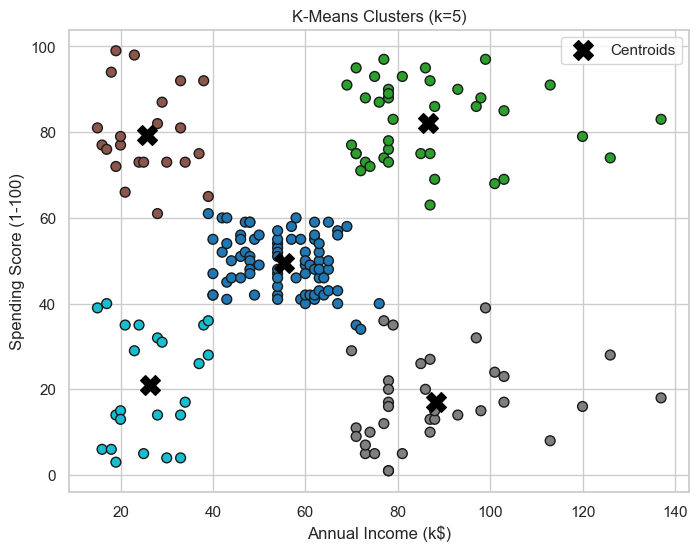

In [8]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='tab10', s=50, edgecolor='k')
plt.scatter(centroids[:,0], centroids[:,1], s=200, marker='X', c='black', label="Centroids")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title("K-Means Clusters (k=5)")
plt.legend()
plt.show()

In [9]:
sil_score = silhouette_score(X_scaled, labels)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.5546571631111091


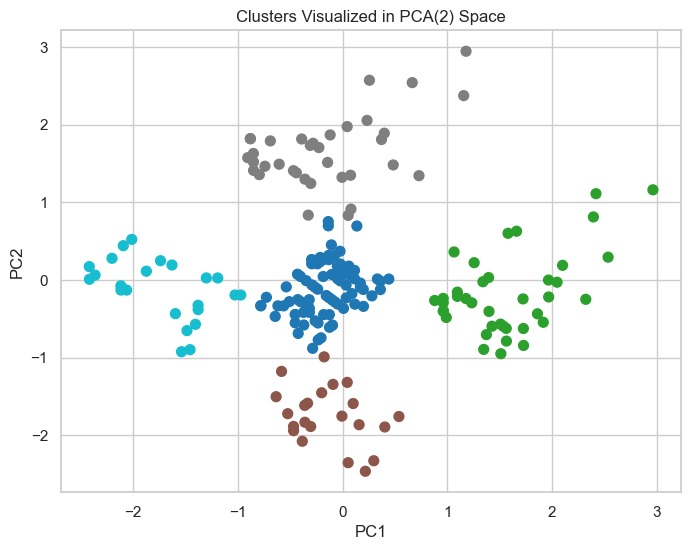

Explained Variance: 1.0


In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='tab10', s=50)
plt.title("Clusters Visualized in PCA(2) Space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

print("Explained Variance:", pca.explained_variance_ratio_.sum())

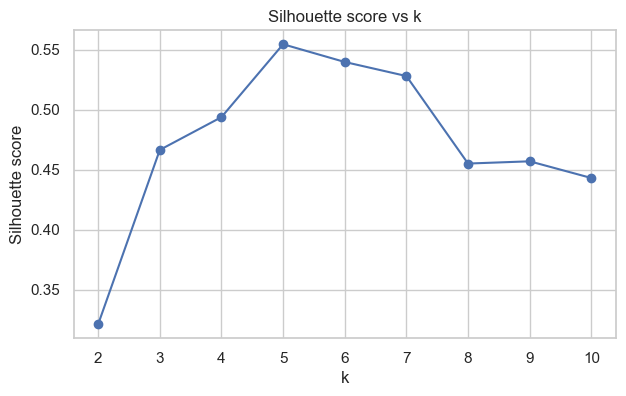

Best k by silhouette: 5


In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
sil_scores = []
k_range = range(2, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, km.labels_))

plt.figure(figsize=(7,4))
plt.plot(list(k_range), sil_scores, marker='o')
plt.xlabel('k'); plt.ylabel('Silhouette score'); plt.title('Silhouette score vs k')
plt.show()
best_k = k_range[int(np.argmax(sil_scores))]
print("Best k by silhouette:", best_k)


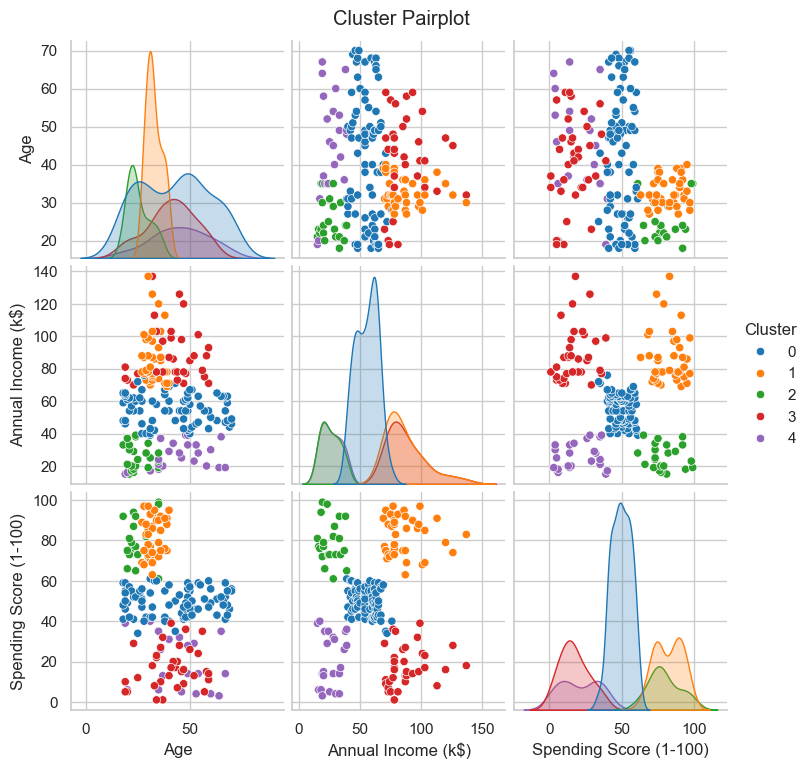

In [14]:
df_clusters = df.copy()
df_clusters['Cluster'] = labels  # labels from KMeans

sns.pairplot(
    df_clusters,
    vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'],
    hue='Cluster',
    palette='tab10'
)
plt.suptitle("Cluster Pairplot", y=1.02)
plt.show()


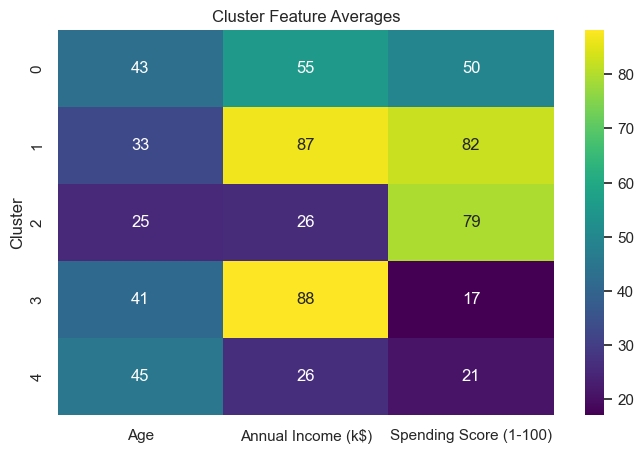

In [15]:
cluster_means = df_clusters.groupby('Cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()

plt.figure(figsize=(8,5))
sns.heatmap(cluster_means, annot=True, cmap='viridis')
plt.title("Cluster Feature Averages")
plt.show()


C:\Users\snhma\AppData\Local\Temp\ipykernel_6676\3701461226.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df_clusters, palette='tab10')
C:\Users\snhma\AppData\Local\Temp\ipykernel_6676\3701461226.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df_clusters, palette='tab10')
C:\Users\snhma\AppData\Local\Temp\ipykernel_6676\3701461226.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df_clusters, palette='tab10')


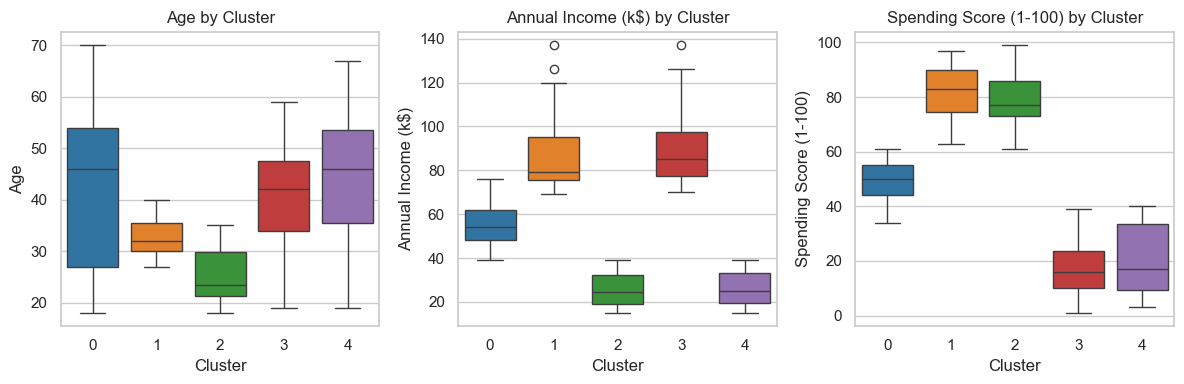

In [16]:
plt.figure(figsize=(12,4))
for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1,3,i+1)
    sns.boxplot(x='Cluster', y=col, data=df_clusters, palette='tab10')
    plt.title(f"{col} by Cluster")
plt.tight_layout()
plt.show()


C:\Users\snhma\AppData\Local\Temp\ipykernel_6676\418125552.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=col, data=df_clusters, palette='tab10')
C:\Users\snhma\AppData\Local\Temp\ipykernel_6676\418125552.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=col, data=df_clusters, palette='tab10')
C:\Users\snhma\AppData\Local\Temp\ipykernel_6676\418125552.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y=col, data=df_clusters, palette='tab10')


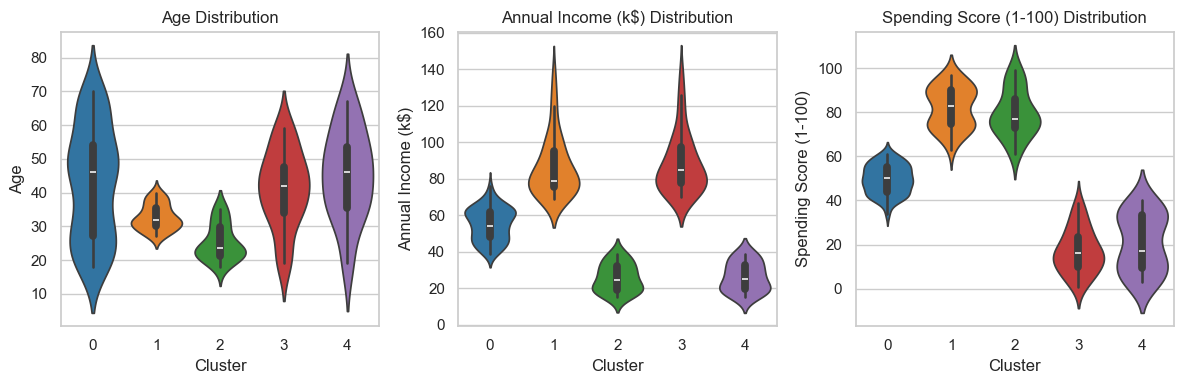

In [18]:
plt.figure(figsize=(12,4))
for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1,3,i+1)
    sns.violinplot(x='Cluster', y=col, data=df_clusters, palette='tab10')
    plt.title(f"{col} Distribution")
plt.tight_layout()
plt.show()


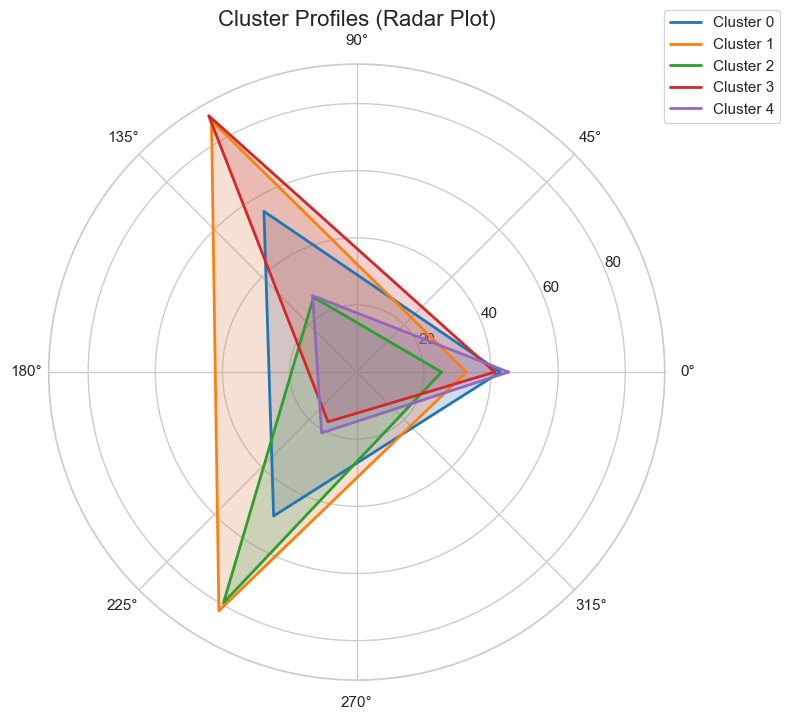

In [19]:
import numpy as np
import matplotlib.pyplot as plt

features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
cluster_means = df_clusters.groupby('Cluster')[features].mean()

categories = features
N = len(categories)

angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # complete loop

plt.figure(figsize=(8,8))
colors = sns.color_palette('tab10', len(cluster_means))

for i, (idx, row) in enumerate(cluster_means.iterrows()):
    values = row.tolist()
    values += values[:1]  
    plt.polar(angles, values, color=colors[i], linewidth=2, label=f'Cluster {idx}')
    plt.fill(angles, values, alpha=0.25)

plt.title("Cluster Profiles (Radar Plot)", size=16)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()


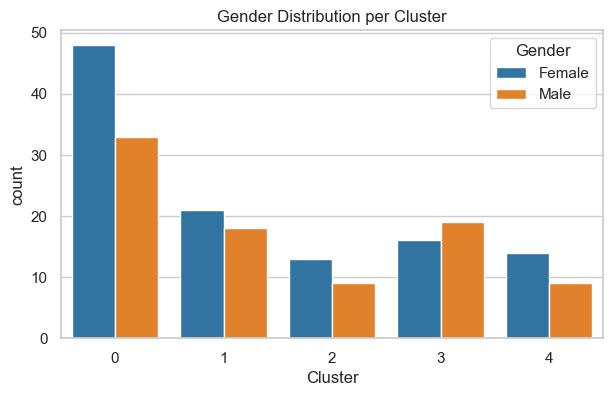

In [21]:
if 'Gender' in df.columns:
    plt.figure(figsize=(7,4))
    sns.countplot(x='Cluster', hue='Gender', data=df_clusters, palette='tab10')
    plt.title("Gender Distribution per Cluster")
    plt.show()


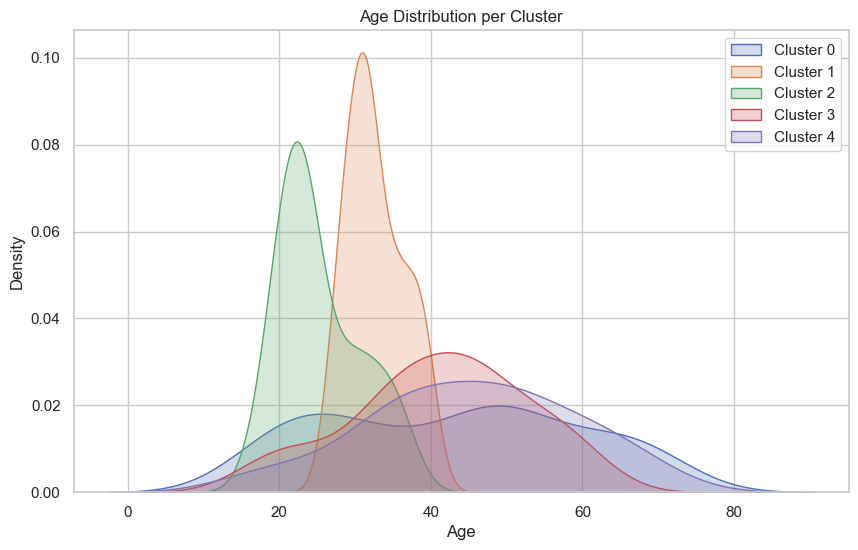

In [22]:
plt.figure(figsize=(10,6))
for c in sorted(df_clusters['Cluster'].unique()):
    subset = df_clusters[df_clusters['Cluster']==c]
    sns.kdeplot(subset['Age'], label=f"Cluster {c}", fill=True)

plt.title("Age Distribution per Cluster")
plt.xlabel("Age")
plt.legend()
plt.show()


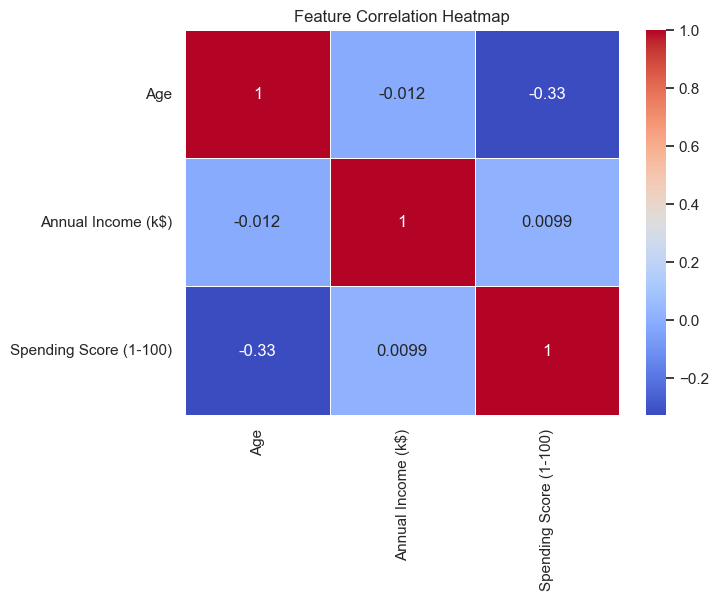

In [23]:
plt.figure(figsize=(7,5))
sns.heatmap(df[['Age','Annual Income (k$)','Spending Score (1-100)']].corr(), 
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


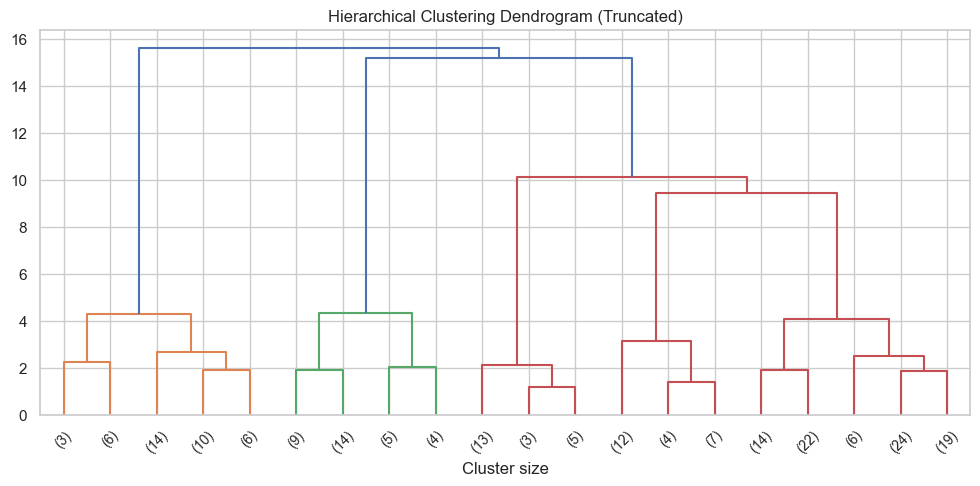

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(12,5))
Z = linkage(X_scaled, method='ward')
dendrogram(Z, truncate_mode='lastp', p=20, leaf_rotation=45, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram (Truncated)")
plt.xlabel("Cluster size")
plt.show()


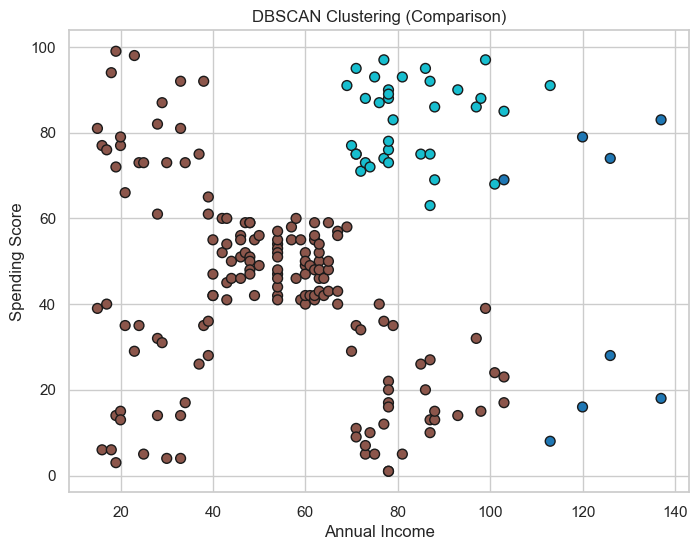

Unique DBSCAN labels (clusters): [-1  0  1]


In [25]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5, min_samples=5)
db_labels = db.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=db_labels, cmap='tab10', s=50, edgecolor='k')
plt.title("DBSCAN Clustering (Comparison)")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

print("Unique DBSCAN labels (clusters):", np.unique(db_labels))


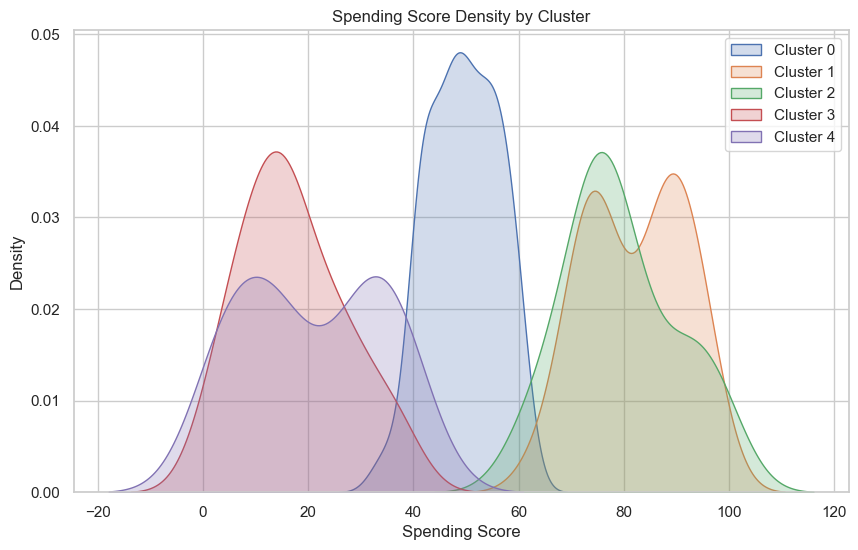

In [26]:

plt.figure(figsize=(10,6))
for c in sorted(df_clusters['Cluster'].unique()):
    sns.kdeplot(df_clusters[df_clusters['Cluster']==c]['Spending Score (1-100)'], 
                fill=True, label=f"Cluster {c}")
plt.title("Spending Score Density by Cluster")
plt.xlabel("Spending Score")
plt.legend()
plt.show()
